# Part 1: importing and Reading the dataset

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("insurance.csv")

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Part 2 : Data Undestanding

In [ ]:
data.shape

(1338, 7)

In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
data.shape

(1338, 7)

# Part 3: Solving Missing Values

In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Part 4: Ecoding Categorical data into a numerical

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:

data['sex']= data['sex'].map({'male':1, 'female':0})
data['smoker']= data['smoker'].map({'yes':1, 'no':0})

data['region']= data['region'].map({'southeast':1, 'southwest':0 ,'northwest'  : 2, 'northeast' : 3})



In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [ ]:
data.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

# Part 5: Visualizing the data

## Gender Distribution

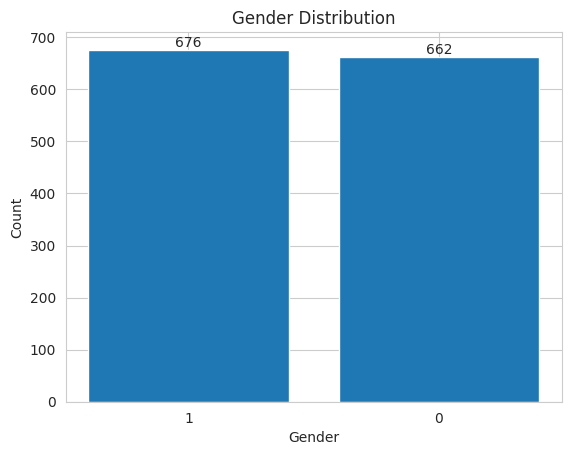

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# variablekaan wuxu haaya 0 1 : 0 femal 1 male
gender_counts = data['sex'].value_counts()

# Sort the gender counts in descending order
gender_counts_sorted = gender_counts.sort_values(ascending=False)

# Get the index of the sorted series
sorted_index = gender_counts_sorted.index

# Create a new list of genders with the highest count at the beginning
sorted_genders = [sorted_index[0]] + sorted_index[1:].tolist()

# Create a new series with the sorted genders
gender_counts_sorted_reordered = gender_counts_sorted.reindex(sorted_genders)

# Create a bar plot to visualize the gender distribution
plt.bar(range(len(gender_counts_sorted_reordered)), gender_counts_sorted_reordered.values)

# Add count values on top of each bar
for i, count in enumerate(gender_counts_sorted_reordered.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

# Set the x-axis tick labels to the sorted genders
plt.xticks(range(len(gender_counts_sorted_reordered)), gender_counts_sorted_reordered.index)

# Display the plot
plt.show()

## who is more smoke, male or femal

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


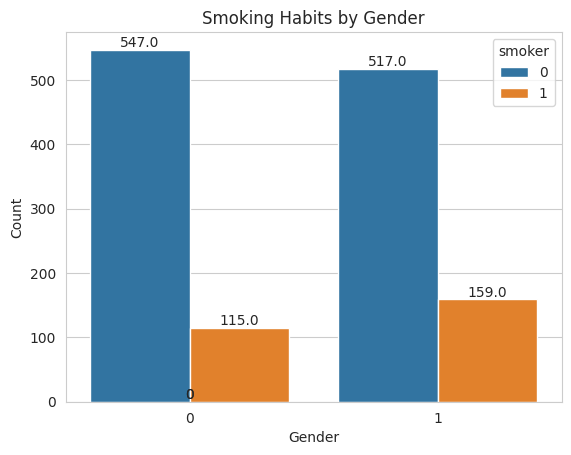

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Count the number of smokers for each gender
smoker_counts = data.groupby('sex')['smoker'].value_counts().unstack()

# Set the style for seaborn
sns.set_style('whitegrid')

# Reset the index to make 'sex' a column
smoker_counts = smoker_counts.reset_index()

# Melt the DataFrame to convert it to long format
smoker_melted = smoker_counts.melt(id_vars='sex', var_name='smoker', value_name='count')

# Create a grouped bar plot to compare smoking habits between genders
ax = sns.barplot(x='sex', y='count', hue='smoker', data=smoker_melted)

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Smoking Habits by Gender')

# Display the plot
plt.show()

In [ ]:
data.shape

(1338, 7)

In [ ]:
import pandas as pd


# Group the data by 'sex' and 'smoker' columns and count the occurrences
smoker_counts = data.groupby(['sex', 'smoker']).size().reset_index(name='count')

# Pivot the data to display smoking habits by gender
smoker_table = smoker_counts.pivot(index='sex', columns='smoker', values='count')

# Rename the columns
smoker_table.columns = ['Non-Smoker', 'Smoker']

# Display the table
print(smoker_table)

     Non-Smoker  Smoker
sex                    
0           547     115
1           517     159


# part 6: Splittling  data into test and train

In [ ]:

from sklearn.model_selection import train_test_split


X = data.drop(['charges'], axis = 1)
y = data['charges']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1070, 6)

In [ ]:
X_test.shape

(268, 6)

In [ ]:
y_train.shape


(1070,)

In [ ]:
y_test.shape

(268,)

## Normalizing the train and test

In [ ]:

from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Apply the scaler to both the training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Part 7: Building different Models

# Model 1: Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 33635210.43117845
Root Mean Squared Error (RMSE): 5799.5870914383595
R-squared (R2): 0.7833463107364536


# Model 2: Random Forest Regresson

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forest Regression model
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 20883948.353410047
Root Mean Squared Error (RMSE): 4569.895879930969
R-squared (R2): 0.8654807150258959


# Model 3: SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Create an SVR model
svr_model = SVR()

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 165839509.92452022
Root Mean Squared Error (RMSE): 12877.868997800848
R-squared (R2): -0.06821813183902203


# Model 4: Gradient Boosting Regressor

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Gradient Boosting Regression model
gb_model = GradientBoostingRegressor()

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 18928866.266080547
Root Mean Squared Error (RMSE): 4350.731693184555
R-squared (R2): 0.8780739392573809


In [ ]:
import pandas as pd

# Create a dictionary containing the model names and corresponding R2 scores
model_scores = {
    "Linear Regression": linear_model.score(X_test, y_test),
    "Random Forest Regression": rf_model.score(X_test, y_test),
    "SVR": svr_model.score(X_test, y_test),
    "Gradient Boosting Regression": gb_model.score(X_test, y_test)
}

# Create a DataFrame from the dictionary
df = pd.DataFrame.from_dict(model_scores, orient='index', columns=["R2 Score"])

# Add a column for the model names
df["Model"] = df.index

# Reset the index
df.reset_index(drop=True, inplace=True)

# Print the DataFrame
print(df)

   R2 Score                         Model
0  0.783346             Linear Regression
1  0.865481      Random Forest Regression
2 -0.068218                           SVR
3  0.878074  Gradient Boosting Regression


# Choosing the best model

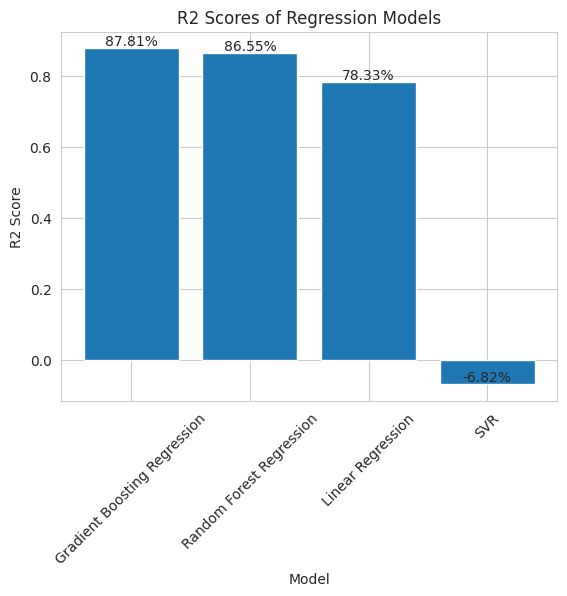

In [ ]:
import matplotlib.pyplot as plt

# Create a dictionary containing the model names and corresponding R2 scores
model_scores = {
    "Linear Regression": linear_model.score(X_test, y_test),
    "Random Forest Regression": rf_model.score(X_test, y_test),
    "SVR": svr_model.score(X_test, y_test),
    "Gradient Boosting Regression": gb_model.score(X_test, y_test)
}

# Sort the model scores in descending order
sorted_model_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Extract the sorted model names and R2 scores
model_names = [item[0] for item in sorted_model_scores]
r2_scores = [item[1] for item in sorted_model_scores]

# Create the bar plot
plt.bar(model_names, r2_scores)

# Add labels and title
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.title("R2 Scores of Regression Models")

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Add the percentage values on top of each bar
for i, score in enumerate(r2_scores):
    plt.text(i, score, f"{score:.2%}", ha="center", va="bottom")

# Display the plot
plt.show()

# Part 8:  creating a test file

In [ ]:
import numpy as np
import pandas as pd

column_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
num_rows = 500

# Generate random data for each column
age = np.random.randint(18, 65, size=num_rows)
sex = np.random.choice(['male', 'female'], size=num_rows)
bmi = np.random.uniform(18.0, 40.0, size=num_rows)
children = np.random.randint(0, 4, size=num_rows)
smoker = np.random.choice(['yes', 'no'], size=num_rows)
region = np.random.choice(['northeast', 'northwest', 'southeast', 'southwest'], size=num_rows)

# Create the DataFrame
data = pd.DataFrame({
    'age': age,
    'sex': sex,
    'bmi': bmi,
    'children': children,
    'smoker': smoker,
    'region': region,
})

# Save the DataFrame as a CSV file
data.to_csv('test.csv', index=False)

print("CSV file 'test.csv' has been saved.")

CSV file 'test.csv' has been saved.


# part 9: reading and preprocessing the test data

In [ ]:
test = pd.read_csv("test.csv")

In [ ]:
test.head()

,age,sex,bmi,children,smoker,region
0,56,male,30.547687,2,yes,southeast
1,50,male,20.487808,2,no,southeast
2,42,female,30.038661,2,yes,southeast
3,50,male,39.761235,1,yes,northeast
4,51,female,33.094815,2,yes,northwest


## encoding categorical to numeical

In [ ]:

test['sex']= test['sex'].map({'male':1, 'female':0})
test['smoker']= test['smoker'].map({'yes':1, 'no':0})

test['region']= test['region'].map({'southeast':1, 'southwest':0 ,'northwest'  : 2, 'northeast' : 3})



In [ ]:
test.head()

,age,sex,bmi,children,smoker,region
0,56,1,30.547687,2,1,1
1,50,1,20.487808,2,0,1
2,42,0,30.038661,2,1,1
3,50,1,39.761235,1,1,3
4,51,0,33.094815,2,1,2


# Part 10: predicitng unseen data

In [ ]:

gb_model.predict(test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


array([62217.68685536, 32216.77946706, 62217.68685536, 49311.77893572,
       62217.68685536, 48846.46557277, 62217.68685536, 49728.89681876,
       15272.14744386, 48846.46557277, 15843.88633879, 15843.88633879,
       15843.88633879, 48846.46557277, 62217.68685536, 59384.59670024,
       49311.77893572, 49728.89681876, 16025.67159945, 49311.77893572,
       16025.67159945, 49311.77893572, 16025.67159945, 15843.88633879,
       32216.77946706, 62217.68685536, 49728.89681876, 49311.77893572,
       62217.68685536, 62217.68685536, 49728.89681876, 59384.59670024,
       15272.14744386, 32216.77946706, 32216.77946706, 49311.77893572,
       62217.68685536, 62217.68685536, 32216.77946706, 62217.68685536,
       15272.14744386, 62217.68685536, 49728.89681876, 15272.14744386,
       62217.68685536, 62217.68685536, 62217.68685536, 32216.77946706,
       59384.59670024, 32216.77946706, 16025.67159945, 15843.88633879,
       32216.77946706, 62217.68685536, 29277.26377997, 49263.58345581,
      

In [ ]:
test

,age,sex,bmi,children,smoker,region
0,56,1,30.547687,2,1,1
1,50,1,20.487808,2,0,1
2,42,0,30.038661,2,1,1
3,50,1,39.761235,1,1,3
4,51,0,33.094815,2,1,2
...,...,...,...,...,...,...
495,61,0,19.691096,0,0,2
496,41,0,31.381568,0,1,1
497,56,1,36.785244,3,1,2
498,30,1,35.582241,0,0,0


## Model Deployment


In [1]:
%%writefile med_cost.py

import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = pd.read_csv("insurance.csv")

# Preprocess the data
data['sex'] = data['sex'].map({'male': 1, 'female': 0})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['region'] = data['region'].map({'southeast': 1, 'southwest': 0, 'northwest': 2, 'northeast': 3})

# Split the data into features and target
X = data.drop(['charges'], axis=1)
y = data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Apply the scaler to both the training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Gradient Boosting Regression model
gb_model = GradientBoostingRegressor()

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Create a Streamlit app
st.title("Insurance Charges Prediction")
st.write("Please enter the following information for prediction:")

# Create input fields for user inputs
age = st.slider("Age", min_value=18, max_value=100, value=30)
sex = st.selectbox("Sex", ['female', 'male'])
bmi = st.number_input("BMI", min_value=10.0, max_value=50.0, value=25.0)
children = st.selectbox("Number of Children", [0, 1, 2, 3, 4, 5])
smoker = st.selectbox("Smoker", ['no', 'yes'])
region = st.selectbox("Region", ['southwest', 'southeast', 'northwest', 'northeast'])

# Preprocess the user inputs
sex = 1 if sex == 'male' else 0
smoker = 1 if smoker == 'yes' else 0
region = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}[region]

# Create a DataFrame for the user inputs
input_data = pd.DataFrame([[age, sex, bmi, children, smoker, region]],
                          columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

# Scale the user inputs using the same scaler
input_data_scaled = scaler.transform(input_data)

# Predict the insurance charges for the user inputs
prediction = gb_model.predict(input_data_scaled)

# Display the prediction
st.write("Predicted Insurance Charges:", prediction[0])

Writing med_cost.py


In [2]:
# running the app
!streamlit run med_cost.py &>/dev/null&

In [3]:
# installing pyngrok
!pip install -q pyngrok

In [6]:


# making the locally-hosted web application to be publicly accessible
from pyngrok import ngrok

ngrok.set_auth_token ('2czZtwjv30n8NKzmr9ddbhKECCe_5TwyAq5vC931maAmdJ8h4')

public_url = ngrok.connect('8502')
public_url

<NgrokTunnel: "https://6db5-34-19-110-72.ngrok-free.app" -> "http://localhost:8502">